In [2]:
#! /usr/bin/python3
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
#             ^
#             |
#
#         d; V={4,7,10}; grid(1000)
#
#             |
#             ^
# --------------------------
# delta, phi = incline; distort
# k11, k22, k33 = 12.6E-12, 6.1E-12, 18.65E-12
# eps_para, eps_vert = 12.23*eps0, 4.75*eps0
# the_0 = 5 * (pi / 180)
# phi_0 = 270 * (pi / 180)
# ddp = 0.75

In [3]:
eps0 = 8.854E-12

# k11, k22, k33 = 12.6E-12, 6.1E-12, 18.65E-12
# eps_para, eps_vert = 12.23*eps0, 4.75*eps0

k11, k22, k33 = 13.7E-12, 7.0E-12, 16.8E-12
eps_para, eps_vert = 7.3*eps0, 3.6*eps0

deps = eps_para - eps_vert

the_0 = 5 * (pi / 180)
phi_0 = 270 * (pi / 180)
vol_0 = 10
h = 1E-6 # 1um
NUM_GRID = 100
d = h*NUM_GRID

p_0 = d / 0.75
q_0 = 2*pi / p_0


In [8]:
V_spec = [4, 7, 10]
V_spec = [10]

THE = the_0*rand(NUM_GRID)
THE[0] = the_0
PHI = phi_0*rand(NUM_GRID)
PHI[0] = phi_0
VOL = vol_0*rand(NUM_GRID)
VOL[0] = vol_0

THE_NXT, PHI_NXT, VOL_NXT  = THE.copy(), PHI.copy(), VOL.copy()


In [9]:
def f(the):
    return k11*cos(the)**2 + k33*sin(the)**2

def g(the):
    return (k22*cos(the)**2 + k33*sin(the)**2)*cos(the)**2

def df(the, the_p, the_n):
    return (k33 -k11)*sin(2*the)*(the_p - the_n) / (2*h)

def dg(the, the_p, the_n):
    return (-k22 + (-k22 + k33)*cos(2*the))*sin(2*the)*(the_p - the_n)/(2*h)

def calc_theta(the, the_p, the_n, vol_p, vol_n, phi_p, phi_n):
    return((0.125 / f(the)) * ( deps*cos(the)*sin(the)*(vol_p - vol_n)**2 + 4*f(the)*(the_p + the_n) - 2*h*k22*q_0*sin(2*the)*(phi_p - phi_n) + 2*h*(the_p - the_n)*df(the, the_p ,the_n)))

def calc_phi(the, the_p, the_n, vol_p, vol_n, phi_p, phi_n):
    return((0.25 / g(the))*(h*k22*q_0*sin(2*the)*(the_p - the_n) + 2*g(the)*(phi_p + phi_n) + h*dg(the, the_p ,the_n)*(phi_p - phi_n)))

def calc_volt(the, the_p, the_n, vol_p, vol_n, phi_p, phi_n):
    return((2*(eps_para * sin(the)**2 + eps_vert * cos(the)**2 )*(vol_p - vol_n) + deps*cos(the)*sin(the)*(the_p - the_n)*(vol_p - vol_n)) / (4*(eps_para * sin(the)**2 + eps_vert * cos(the)**2)))


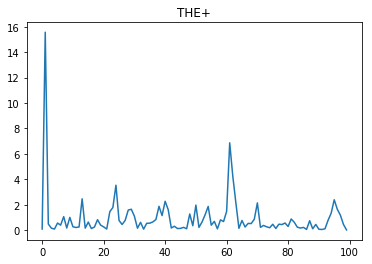

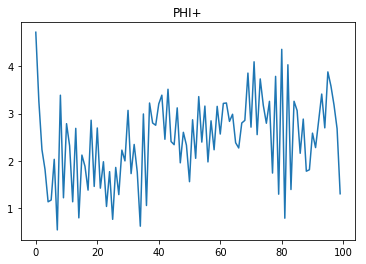

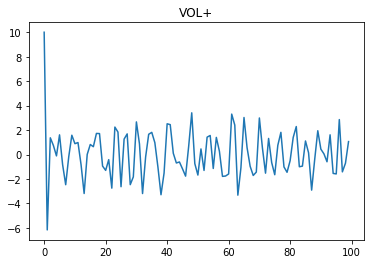

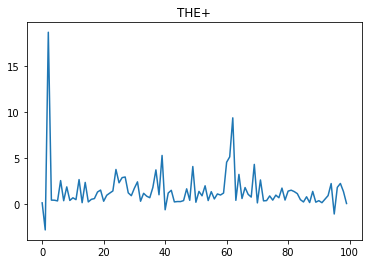

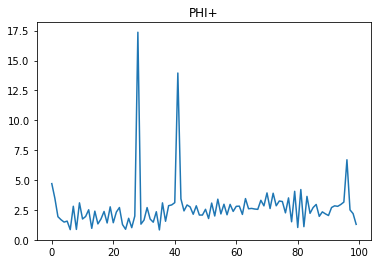

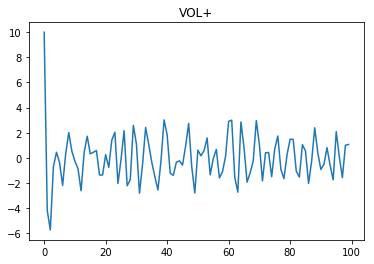

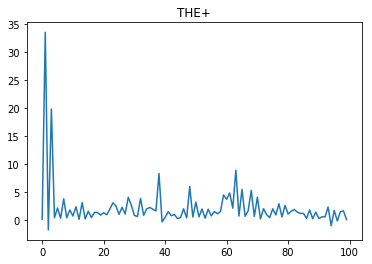

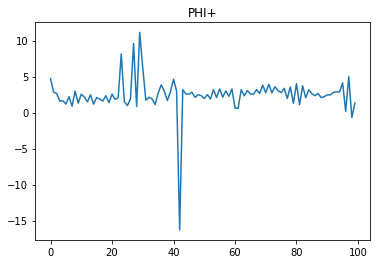

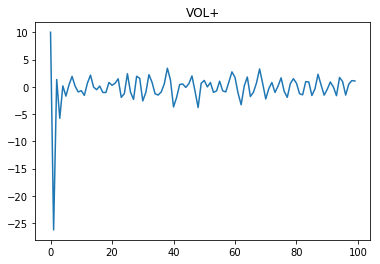

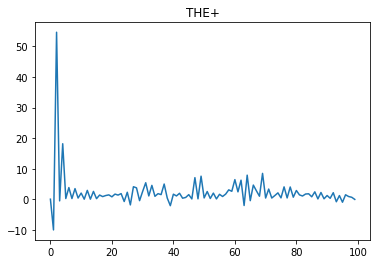

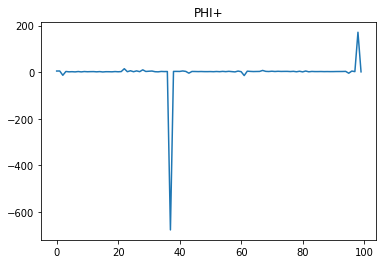

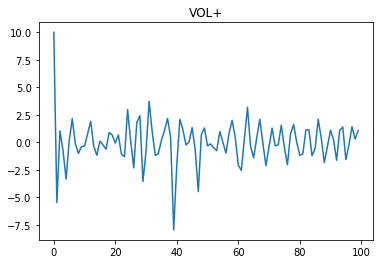

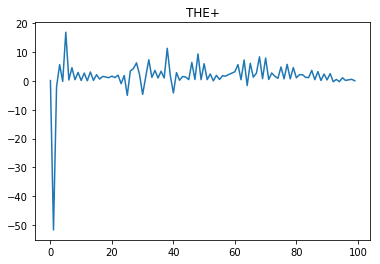

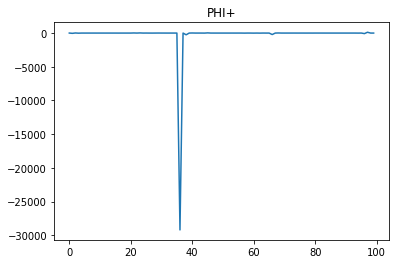

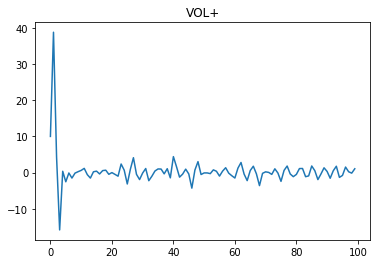

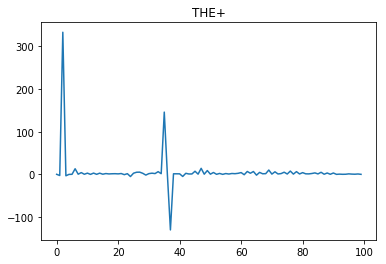

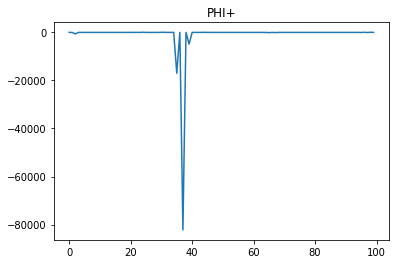

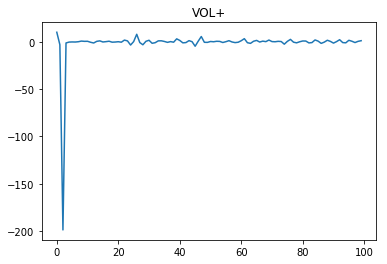

In [12]:
thres = 1E-6
idx = 0
while True: # -- iterate n
    idx += 1
    if idx > 1:
        THE, PHI, VOL = THE_NXT.copy(), PHI_NXT.copy(), VOL_NXT.copy()
    for k in range(1, NUM_GRID-1): #update
        # XX_p, XX_n : positive, negative. XX(k+1), XX(k-1)
        the, the_p, the_n = THE[k],THE[k+1],THE[k-1]
        phi, phi_p, phi_n = PHI[k],PHI[k+1],PHI[k-1]
        vol, vol_p, vol_n = VOL[k],VOL[k+1],VOL[k-1]

        THE_NXT[k] = calc_theta(the, the_p, the_n, vol_p, vol_n, phi_p, phi_n)

        PHI_NXT[k] = calc_phi(the, the_p, the_n, vol_p, vol_n, phi_p, phi_n)

        VOL_NXT[k] = calc_volt(the, the_p, the_n, vol_p, vol_n, phi_p, phi_n)


    plt.figure()
    plt.plot(THE)
    plt.title("THE+")
    plt.figure()
    plt.plot(PHI)
    plt.title("PHI+")
    plt.figure()
    plt.plot(VOL)
    plt.title("VOL+")
    plt.show()
  
    if idx > 5: break
